In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [722]:
custSegDF = pd.read_csv('Train.csv')
new_Data_test = pd.read_csv('Test.csv')

In [724]:
new_Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


### Checking duplicate Columns

In [726]:
custSegDF[custSegDF.duplicated()].shape

(0, 11)

#### Observation: 
  ##### - No Duplicate Records Found

In [728]:
missing_values = custSegDF.isnull().sum()/custSegDF.shape[0]*100
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")
missing_values

ID                  0.00%
Gender              0.00%
Ever_Married        1.74%
Age                 0.00%
Graduated           0.97%
Profession          1.54%
Work_Experience    10.28%
Spending_Score      0.00%
Family_Size         4.15%
Var_1               0.94%
Segmentation        0.00%
dtype: object

In [388]:
# for i in df.select_dtypes(include="number").columns:
#     sns.histplot(custSegDF, x=i, color='green', kde=True)
#     plt.show()

In [390]:
# for i in df.select_dtypes(include="number").columns:
#     sns.boxplot(custSegDF, x=i, color='cyan')
#     plt.show()

In [392]:
# for i in df.select_dtypes(include="number").columns:
#     sns.boxplot(custSegDF, x=i, color='cyan')
#     plt.show()

In [730]:
# find the limits
upper_limit = custSegDF['Work_Experience'].mean() + 3*custSegDF['Work_Experience'].std()
lower_limit = custSegDF['Work_Experience'].mean() - 3*custSegDF['Work_Experience'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 12.861952169524843
lower limit: -7.578625743222867


In [732]:
custSegDF.loc[(custSegDF['Work_Experience'] > upper_limit) | (custSegDF['Work_Experience'] < lower_limit)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
22,465602,Male,Yes,33,Yes,Artist,13.0,Low,2.0,Cat_3,A
42,464590,Female,No,27,Yes,Artist,14.0,Low,3.0,Cat_6,A
55,462110,Male,Yes,32,Yes,Artist,14.0,Average,2.0,Cat_6,B
321,467714,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A
338,460255,Female,No,38,Yes,Doctor,14.0,Low,1.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
7798,461215,Female,No,36,Yes,Artist,13.0,Low,1.0,Cat_6,D
7835,463655,Male,Yes,39,Yes,Artist,13.0,Low,2.0,Cat_6,B
7990,465597,Female,No,43,Yes,Entertainment,14.0,Low,1.0,Cat_6,A
8028,465501,Male,Yes,40,Yes,Artist,13.0,High,1.0,Cat_4,D


In [734]:
new_custSegDF = custSegDF.copy()
new_custSegDF.loc[(new_custSegDF['Work_Experience']>=upper_limit), 'Work_Experience'] = upper_limit
new_custSegDF.loc[(new_custSegDF['Work_Experience']<=lower_limit), 'Work_Experience'] = lower_limit

<Axes: ylabel='Work_Experience'>

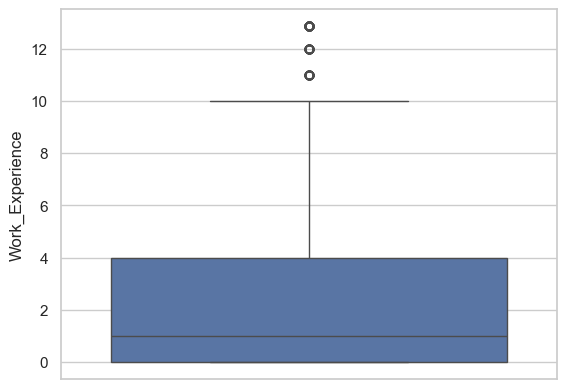

In [736]:
sns.boxplot(new_custSegDF['Work_Experience'])

<Axes: xlabel='Work_Experience', ylabel='Count'>

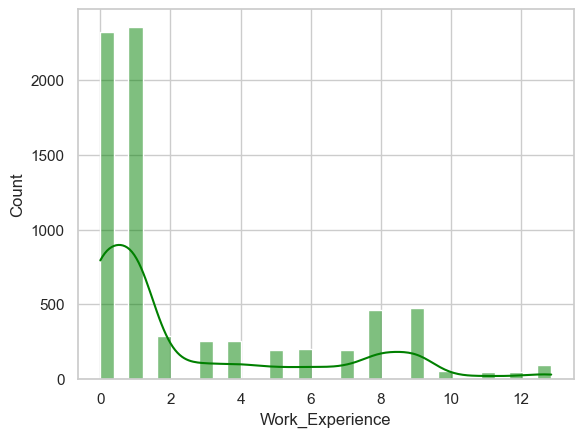

In [738]:
sns.histplot(new_custSegDF['Work_Experience'],color='green', kde=True)

<Axes: ylabel='Work_Experience'>

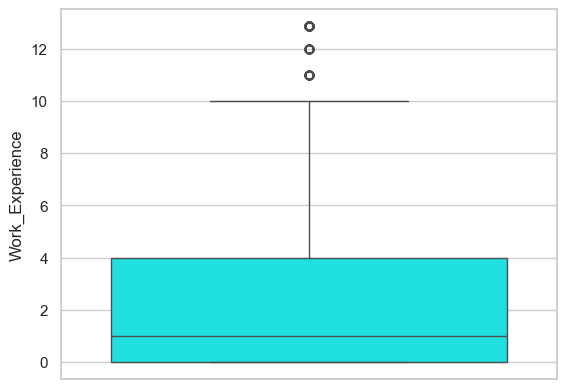

In [740]:
new_custSegDF['Work_Experience'] = new_custSegDF['Work_Experience'].fillna(new_custSegDF['Work_Experience'].mean())
sns.boxplot(new_custSegDF['Work_Experience'], color='cyan')

In [742]:
missing_values = new_custSegDF.isnull().sum()/custSegDF.shape[0]*100
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")
missing_values

ID                 0.00%
Gender             0.00%
Ever_Married       1.74%
Age                0.00%
Graduated          0.97%
Profession         1.54%
Work_Experience    0.00%
Spending_Score     0.00%
Family_Size        4.15%
Var_1              0.94%
Segmentation       0.00%
dtype: object

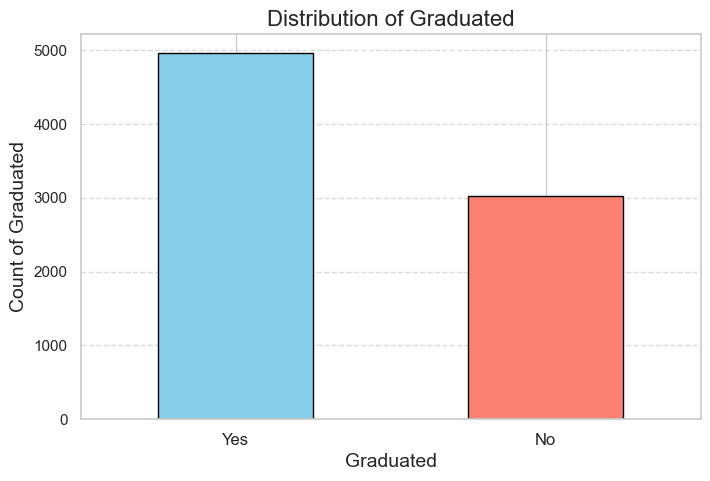

In [744]:
distribution = new_custSegDF['Graduated'].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(8, 5))
distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Graduated', fontsize=16)
plt.xlabel('Graduated', fontsize=14)
plt.ylabel('Count of Graduated', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Replacing with Mode for Graduated,Var_1 and Ever_Married to perform missing Imputation

In [746]:
new_custSegDF['Graduated'] = new_custSegDF['Graduated'].fillna(new_custSegDF['Graduated'].mode()[0])
new_custSegDF['Ever_Married'] = new_custSegDF['Ever_Married'].fillna(new_custSegDF['Ever_Married'].mode()[0])
new_custSegDF['Var_1'] = new_custSegDF['Var_1'].fillna(new_custSegDF['Var_1'].mode()[0])

#### Replacing with Mean for Failiy_Size and Ever_Married to perform missing Imputation

In [748]:
new_custSegDF['Family_Size'] = new_custSegDF['Family_Size'].fillna(new_custSegDF['Family_Size'].mean())

#### Missing impuration for profession by equaly distributing the professions in all categories

In [750]:
new_custSegDF['Profession'].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [752]:
# Step 1: Identify unique categories and missing count
categories = new_custSegDF['Profession'].dropna().unique()  # Unique categories
missing_count = new_custSegDF['Profession'].isnull().sum()  # Total missing values
values_per_category = missing_count // len(categories)
remainder = missing_count % len(categories)
replacement_values = []
for category in categories:
    replacement_values.extend([category] * values_per_category)
if remainder > 0:
    replacement_values.extend(np.random.choice(categories, size=remainder, replace=True))

# Shuffle the replacement values for randomness
np.random.shuffle(replacement_values)

# Step 4: Fill missing values with the generated list
new_custSegDF['Profession']= new_custSegDF['Profession'].apply(
    lambda x: replacement_values.pop(0) if pd.isnull(x) else x
)

In [754]:
missing_values = new_custSegDF.isnull().sum()/new_custSegDF.shape[0]*100
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")
missing_values

ID                 0.00%
Gender             0.00%
Ever_Married       0.00%
Age                0.00%
Graduated          0.00%
Profession         0.00%
Work_Experience    0.00%
Spending_Score     0.00%
Family_Size        0.00%
Var_1              0.00%
Segmentation       0.00%
dtype: object

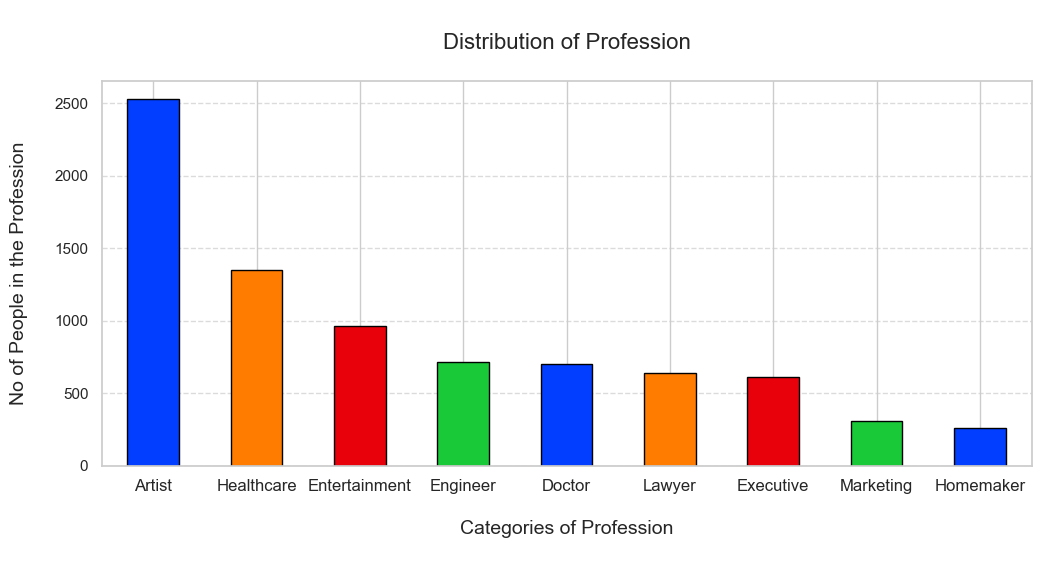

In [756]:
category_counts = new_custSegDF['Profession'].value_counts()
colors=["#023EFF","#FF7C00", "#E8000B","#1AC938"]
#Plot using Matplotlib
plt.figure(figsize=(12, 5))
category_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('\nDistribution of Profession\n', fontsize=16)
plt.xlabel('\nCategories of Profession\n', fontsize=14)
plt.ylabel('No of People in the Profession\n', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

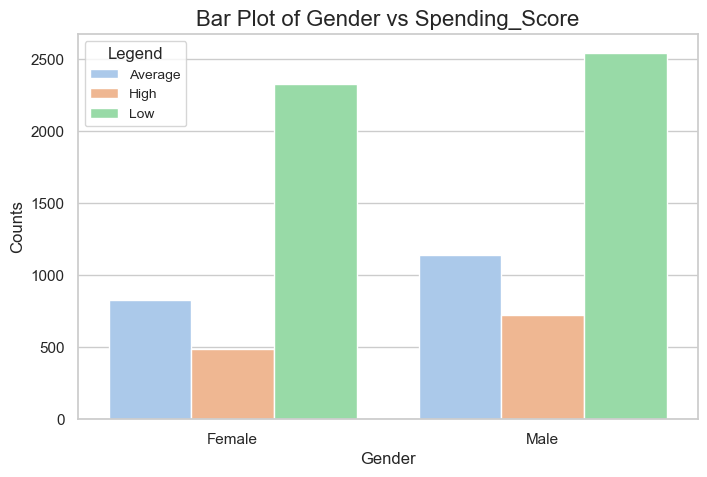

In [758]:
# Count occurrences of combinations of the two categorical columns
category_counts = custSegDF.groupby(['Spending_Score', 'Gender']).size().reset_index(name='Counts')

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=category_counts, x=category_counts['Gender'], y='Counts', hue='Spending_Score', palette='pastel')
plt.title('Bar Plot of Gender vs Spending_Score', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.show()


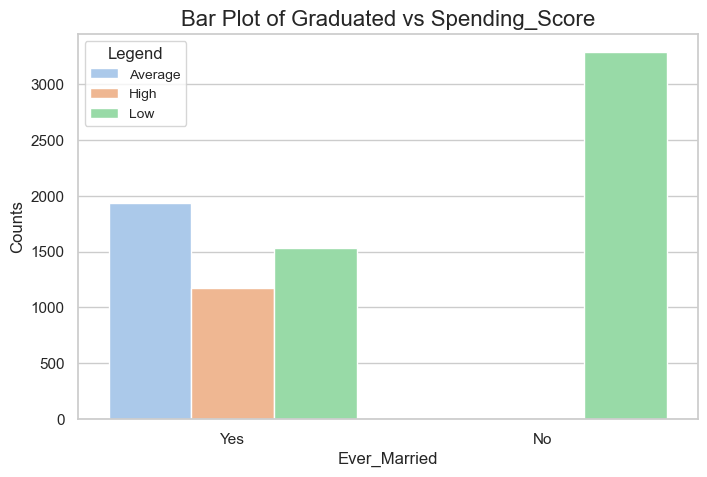

In [762]:
# Count occurrences of combinations of the two categorical columns
category_counts = custSegDF.groupby(['Spending_Score', 'Ever_Married']).size().reset_index(name='Counts')

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=category_counts, x=category_counts['Ever_Married'], y='Counts', hue='Spending_Score', palette='pastel')
plt.title('Bar Plot of Graduated vs Spending_Score', fontsize=16)
plt.xlabel('Ever_Married', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.show()

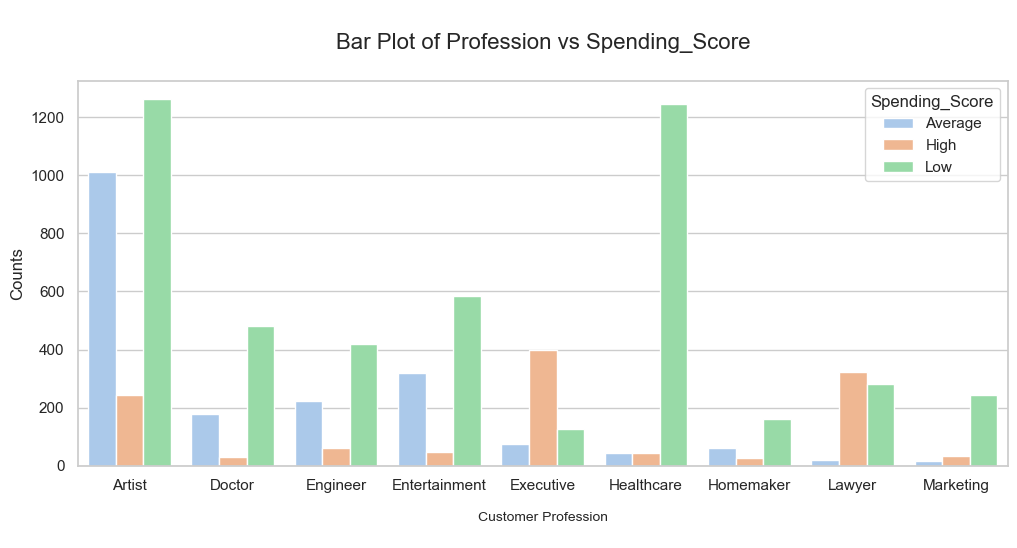

In [764]:
# Count occurrences of combinations of the two categorical columns
category_counts = custSegDF.groupby(['Spending_Score', 'Profession']).size().reset_index(name='Counts')

# Plot using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(data=category_counts, x=category_counts['Profession'], y='Counts',hue='Spending_Score', palette='pastel')
plt.title('\nBar Plot of Profession vs Spending_Score\n', fontsize=16)
plt.xlabel('\nCustomer Profession\n', fontsize=10)
plt.ylabel('Counts', fontsize=12)
# plt.legend(title='Legend', fontsize=10)
plt.show() 

In [766]:
one_hot = pd.get_dummies(new_custSegDF['Gender'], prefix='Gender')
final = pd.concat([new_custSegDF, one_hot], axis=1)
new_custSegDF=final.drop(columns=['Gender'], axis=1)

def replace_boolean_with_int(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace({True: 1, False: 0})
    return df
new_custSegDF = replace_boolean_with_int(new_custSegDF, ['Gender_Female', 'Gender_Male'])
new_custSegDF

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Female,Gender_Male
0,462809,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D,0,1
1,462643,Yes,38,Yes,Engineer,2.633712,Average,3.0,Cat_4,A,1,0
2,466315,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B,1,0
3,461735,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B,0,1
4,462669,Yes,40,Yes,Entertainment,2.633712,High,6.0,Cat_6,A,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,No,22,No,Homemaker,0.000000,Low,7.0,Cat_1,D,0,1
8064,464685,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D,0,1
8065,465406,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D,1,0
8066,467299,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B,1,0


In [768]:
one_hot = pd.get_dummies(new_custSegDF['Profession'], prefix='Profession')
final = pd.concat([new_custSegDF, one_hot], axis=1)
new_custSegDF=final.drop(columns=['Profession'], axis=1)
new_custSegDF.keys()

Index(['ID', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation',
       'Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

In [770]:
def replace_boolean_with_int(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace({True: 1, False: 0})
    return df
new_custSegDF = replace_boolean_with_int(new_custSegDF, ['Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'])
new_custSegDF

,ID,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,No,22,No,1.000000,Low,4.0,Cat_4,D,0,1,0,0,0,0,0,1,0,0,0
1,462643,Yes,38,Yes,2.633712,Average,3.0,Cat_4,A,1,0,0,0,1,0,0,0,0,0,0
2,466315,Yes,67,Yes,1.000000,Low,1.0,Cat_6,B,1,0,0,0,1,0,0,0,0,0,0
3,461735,Yes,67,Yes,0.000000,High,2.0,Cat_6,B,0,1,0,0,0,0,0,0,0,1,0
4,462669,Yes,40,Yes,2.633712,High,6.0,Cat_6,A,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,No,22,No,0.000000,Low,7.0,Cat_1,D,0,1,0,0,0,0,0,0,1,0,0
8064,464685,No,35,No,3.000000,Low,4.0,Cat_4,D,0,1,0,0,0,0,1,0,0,0,0
8065,465406,No,33,Yes,1.000000,Low,1.0,Cat_6,D,1,0,0,0,0,0,0,1,0,0,0
8066,467299,No,27,Yes,1.000000,Low,4.0,Cat_6,B,1,0,0,0,0,0,0,1,0,0,0


In [772]:
one_hot = pd.get_dummies(new_custSegDF['Spending_Score'], prefix='Spending_Score')
final = pd.concat([new_custSegDF, one_hot], axis=1)
new_custSegDF=final.drop(columns=['Spending_Score'], axis=1)
new_custSegDF.keys()

Index(['ID', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Var_1', 'Segmentation', 'Gender_Female', 'Gender_Male',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low'],
      dtype='object')

In [774]:
def replace_boolean_with_int(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace({True: 1, False: 0})
    return df
new_custSegDF = replace_boolean_with_int(new_custSegDF, ['Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low'])
new_custSegDF

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Var_1,Segmentation,Gender_Female,Gender_Male,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,No,22,No,1.000000,4.0,Cat_4,D,0,1,...,0,0,0,1,0,0,0,0,0,1
1,462643,Yes,38,Yes,2.633712,3.0,Cat_4,A,1,0,...,1,0,0,0,0,0,0,1,0,0
2,466315,Yes,67,Yes,1.000000,1.0,Cat_6,B,1,0,...,1,0,0,0,0,0,0,0,0,1
3,461735,Yes,67,Yes,0.000000,2.0,Cat_6,B,0,1,...,0,0,0,0,0,1,0,0,1,0
4,462669,Yes,40,Yes,2.633712,6.0,Cat_6,A,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,No,22,No,0.000000,7.0,Cat_1,D,0,1,...,0,0,0,0,1,0,0,0,0,1
8064,464685,No,35,No,3.000000,4.0,Cat_4,D,0,1,...,0,0,1,0,0,0,0,0,0,1
8065,465406,No,33,Yes,1.000000,1.0,Cat_6,D,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,467299,No,27,Yes,1.000000,4.0,Cat_6,B,1,0,...,0,0,0,1,0,0,0,0,0,1


In [776]:
new_custSegDF['Ever_Married'] = new_custSegDF['Ever_Married'].replace({'Yes': 1, 'No': 0})
new_custSegDF['Graduated'] = new_custSegDF['Graduated'].replace({'Yes': 1, 'No': 0})

In [531]:
new_custSegDF

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Var_1,Segmentation,Gender_Female,Gender_Male,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,0,22,0,1.000000,4.0,Cat_4,D,0,1,...,0,0,0,1,0,0,0,0,0,1
1,462643,1,38,1,2.633712,3.0,Cat_4,A,1,0,...,1,0,0,0,0,0,0,1,0,0
2,466315,1,67,1,1.000000,1.0,Cat_6,B,1,0,...,1,0,0,0,0,0,0,0,0,1
3,461735,1,67,1,0.000000,2.0,Cat_6,B,0,1,...,0,0,0,0,0,1,0,0,1,0
4,462669,1,40,1,2.633712,6.0,Cat_6,A,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,22,0,0.000000,7.0,Cat_1,D,0,1,...,0,0,0,0,0,1,0,0,0,1
8064,464685,0,35,0,3.000000,4.0,Cat_4,D,0,1,...,0,0,1,0,0,0,0,0,0,1
8065,465406,0,33,1,1.000000,1.0,Cat_6,D,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,467299,0,27,1,1.000000,4.0,Cat_6,B,1,0,...,0,0,0,1,0,0,0,0,0,1


In [778]:
one_hot = pd.get_dummies(new_custSegDF['Var_1'], prefix='Var_1')
final = pd.concat([new_custSegDF, one_hot], axis=1)
new_custSegDF=final.drop(columns=['Var_1'], axis=1)
new_custSegDF.keys()

Index(['ID', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [780]:
def replace_boolean_with_int(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace({True: 1, False: 0})
    return df
new_custSegDF = replace_boolean_with_int(new_custSegDF, ['Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'])
new_custSegDF

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0,22,0,1.000000,4.0,D,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,462643,1,38,1,2.633712,3.0,A,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,466315,1,67,1,1.000000,1.0,B,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,1,67,1,0.000000,2.0,B,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,462669,1,40,1,2.633712,6.0,A,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,22,0,0.000000,7.0,D,0,1,0,...,0,0,1,1,0,0,0,0,0,0
8064,464685,0,35,0,3.000000,4.0,D,0,1,0,...,0,0,1,0,0,0,1,0,0,0
8065,465406,0,33,1,1.000000,1.0,D,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8066,467299,0,27,1,1.000000,4.0,B,1,0,0,...,0,0,1,0,0,0,0,0,1,0


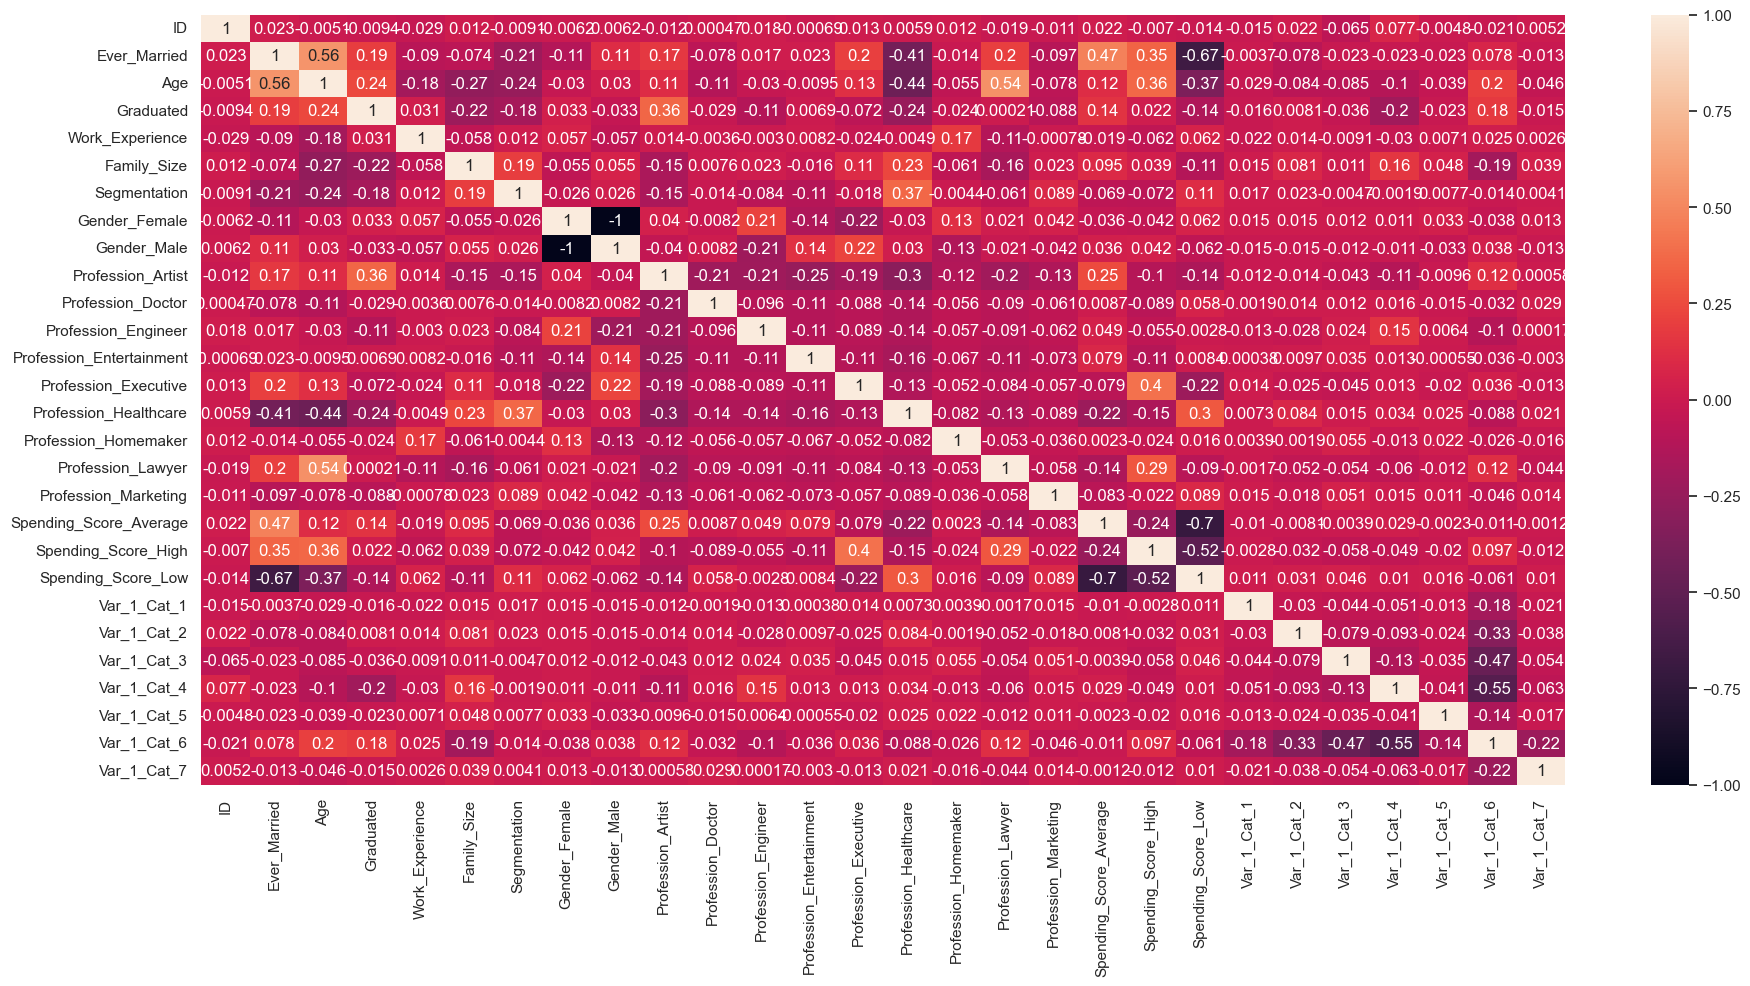

In [784]:
plt.figure(figsize=(22,10))
new_custSegDF=new_custSegDF.copy()
new_custSegDF["Segmentation"]=LabelEncoder().fit_transform(new_custSegDF["Segmentation"])
sns.heatmap(new_custSegDF.corr(),annot=True)
plt.show()

In [808]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_custSegDF)
    errors.append(kmeans.inertia_)

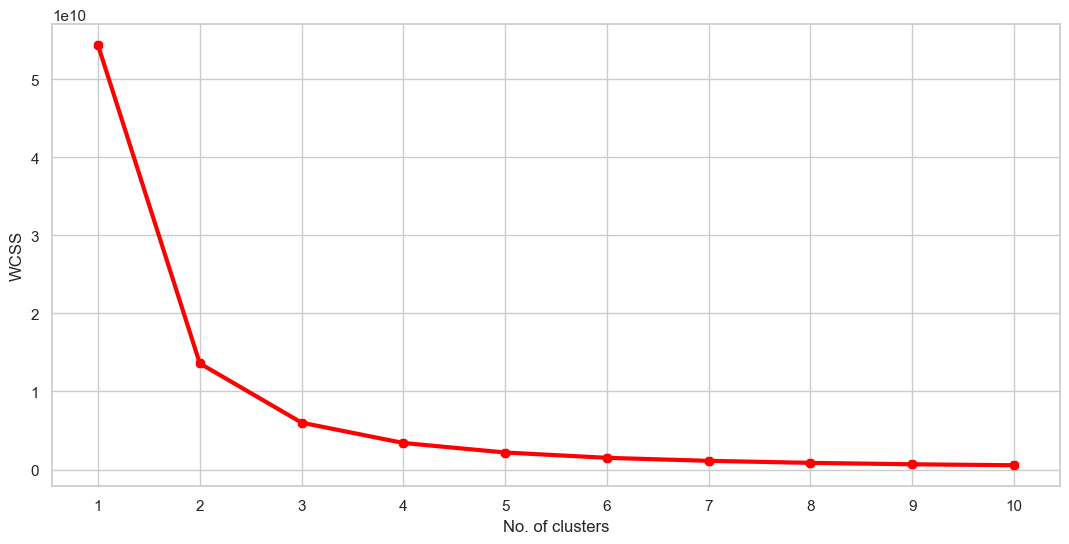

In [810]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [812]:
km = KMeans(n_clusters=4)
km.fit(new_custSegDF)
y = km.predict(new_custSegDF)
new_custSegDF['Label'] = y
new_custSegDF.head()

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Profession_Artist,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Label
0,462809,0,22,0,1.000000,4.0,3,0,1,0,...,0,1,0,0,0,1,0,0,0,3
1,462643,1,38,1,2.633712,3.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,3
2,466315,1,67,1,1.000000,1.0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,461735,1,67,1,0.000000,2.0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,3
4,462669,1,40,1,2.633712,6.0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,3


<Axes: xlabel='Age', ylabel='Work_Experience'>

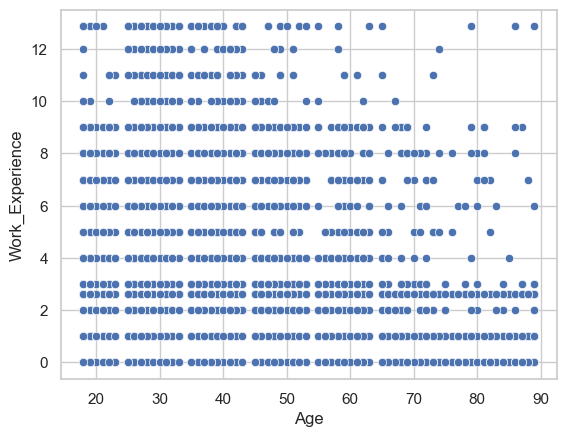

In [658]:
sns.scatterplot(x='Age', y='Work_Experience', data=new_custSegDF)

Data Sample:
   CustomerID  AnnualIncome  SpendingScore
0           1            15             39
1           2            16             81
2           3            17              6
3           4            28             77
4           5            35             40


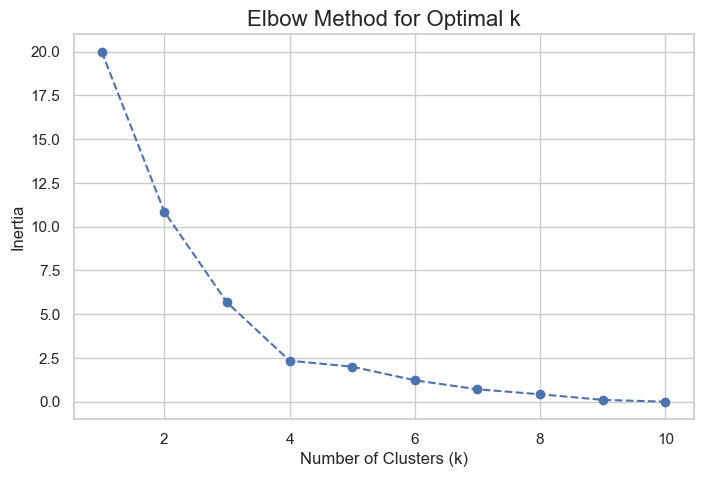

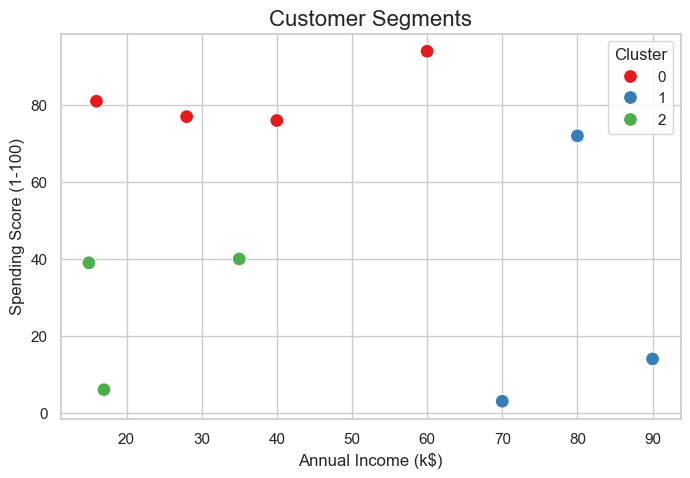


Clustered Data:
   CustomerID  AnnualIncome  SpendingScore  Cluster
0           1            15             39        2
1           2            16             81        0
2           3            17              6        2
3           4            28             77        0
4           5            35             40        2
5           6            40             76        0
6           7            60             94        0
7           8            70              3        1
8           9            80             72        1
9          10            90             14        1


## =========================================================================================

In [553]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 655.8 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 1.3 MB/s eta 0:01:39
   ---------------------------------------- 0.4/124.9 MB 1.5 MB/s eta 0:01:26
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 1.1/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 1.1/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 1.7/124.9 MB 3.1 MB/s eta 0:00:40
    ---

0.9996281606346058


In [556]:
print(classification_report(y,model_xgb.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      1.00      1.00      1858
           2       1.00      1.00      1.00      1970
           3       1.00      1.00      1.00      2268

    accuracy                           1.00      8068
   macro avg       1.00      1.00      1.00      8068
weighted avg       1.00      1.00      1.00      8068



In [595]:
x = new_custSegDF.drop(['Segmentation'], axis=1)
y = new_custSegDF['Segmentation']

In [597]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [609]:
from xgboost import XGBClassifier

# model_xgb=XGBClassifier(learning_rate=0.1,n_jobs=-1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb=XGBClassifier(random_state=42)
model_xgb.fit(x_train,y_train)
print(model_xgb.score(x_train,y_train))

0.886117136659436


In [613]:
y_pred=model_xgb.predict(x_test)

In [617]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[177,  86,  44,  86],
       [ 90, 138,  88,  41],
       [ 34,  94, 239,  46],
       [ 93,  31,  15, 312]], dtype=int64)

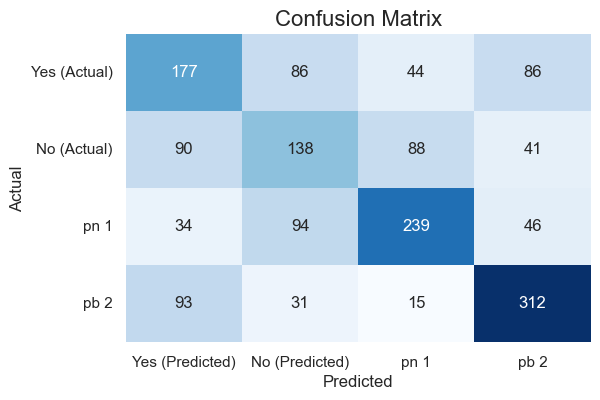

In [621]:
cm_df = pd.DataFrame(cm, index=['Yes (Actual)', 'No (Actual)', 'pn 1', 'pb 2'], columns=['Yes (Predicted)', 'No (Predicted)','pn 1', 'pb 2'])

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

In [601]:
# result=model_xgb.predict_proba(x.drop(columns=["ID"]).values)
# result=[[i[np.argmax(i)],map[np.argmax(i)]] for i in result] 
# result=pd.DataFrame(data=result,columns=["Proba","Result"])
# # result=pd.concat([Data_test["ID"],result],axis=1)
# result

ValueError: Feature shape mismatch, expected: 27, got 26